# Import Libraries, Load Data and Generate Features

In [1]:
# import custom functions
import custom_functions.plot_styles as ps
import custom_functions.time_series_analysis as tsa
import pandas as pd
import plotly.express as px

pd.options.plotting.backend = "plotly"

ps.matplotlib_styles()

In [2]:
df = pd.read_csv("../data/bikemi_csv/daily_outflow.csv", parse_dates=[0], index_col=[0])

daily_outflow = tsa.create_ts_features(
    df, features=["day", "week", "month", "weekends", "holidays"]
)

daily_outflow.head()

,count,day,is_weekend,week,month,holiday
giorno_partenza,,,,,,
2019-01-01,831,2,0,1,1,Capodanno
2019-01-02,3512,3,0,1,1,None
2019-01-03,4126,4,0,1,1,None
2019-01-04,4201,5,0,1,1,None
2019-01-05,2875,6,1,1,1,None


# Visualise the data


## Time Series Line Plot

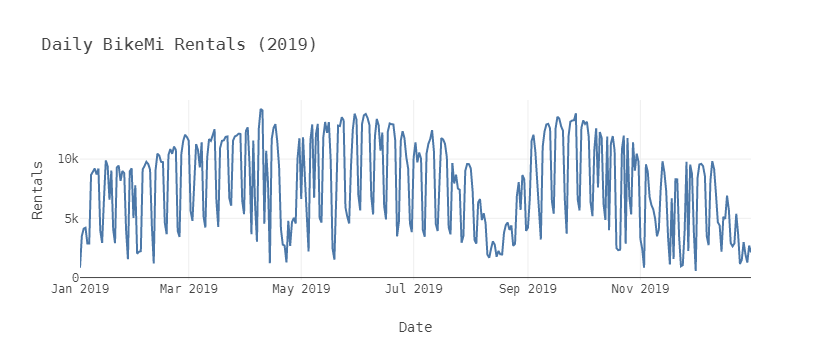

In [3]:
ts_plot = daily_outflow.plot(
    y="count",
    title="Daily BikeMi Rentals (2019)",
    color_discrete_sequence=px.colors.qualitative.T10,
    labels={
        "count": "Rentals ",
        "giorno_partenza": "Date ",
    },
)

ps.plotly_style(ts_plot)

The first thing that comes to mind is that the series displays a great variance. Clearly, the data is non-stationary: we see strong seasonal patterns. These are likely due to weekends and holidays. We can clearly see a trend, where the trip number increases until the middle of the year and then starts decreasing, reaching its lowest in the colder winter months. Let's explore them.

## Histograms

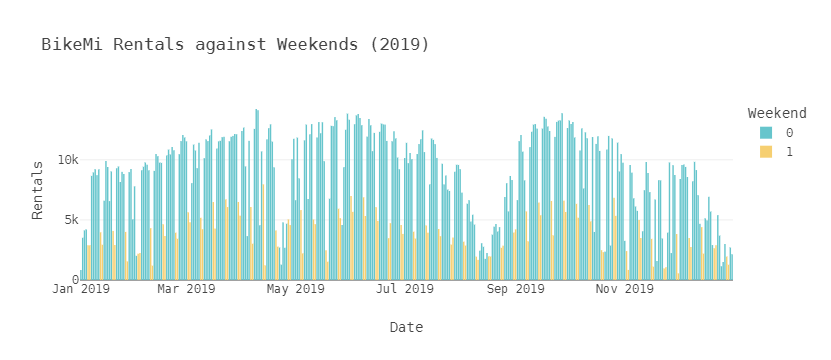

In [4]:
hist_weekends = daily_outflow.plot.bar(
    x=daily_outflow.index,
    y="count",
    title="BikeMi Rentals against Weekends (2019)",
    color="is_weekend",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={"count": "Rentals ", "giorno_partenza": "Date ", "is_weekend": "Weekend "},
)

ps.plotly_style(hist_weekends)

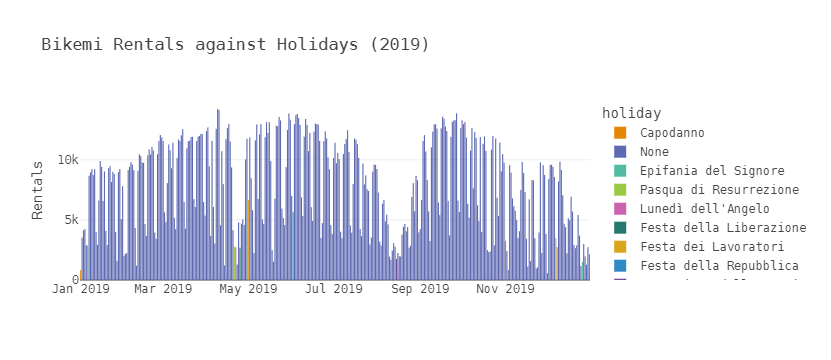

In [5]:
hist_holidays = daily_outflow.plot.bar(
    x=daily_outflow.index,
    y="count",
    title="Bikemi Rentals against Holidays (2019)",
    color="holiday",
    color_discrete_sequence=px.colors.qualitative.Vivid,
    labels={"count": "Rentals ", "giorno_partenza": ""},
).update_traces(hovertemplate=None)

ps.plotly_style(hist_holidays)

## Rolling Statistics

We can plot rolling means to get a better sense of these fluctuations.

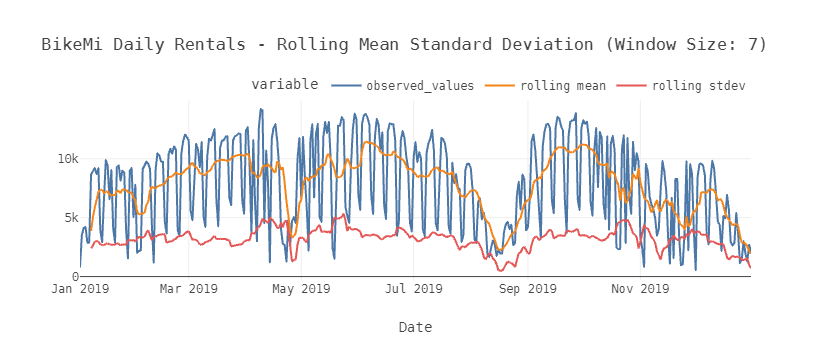

In [6]:
# inspect values with `fig.data`
tsa.px_rolling_statistics(
    ts=daily_outflow, col="count", lags=7, statistics=["mean", "std"]
)

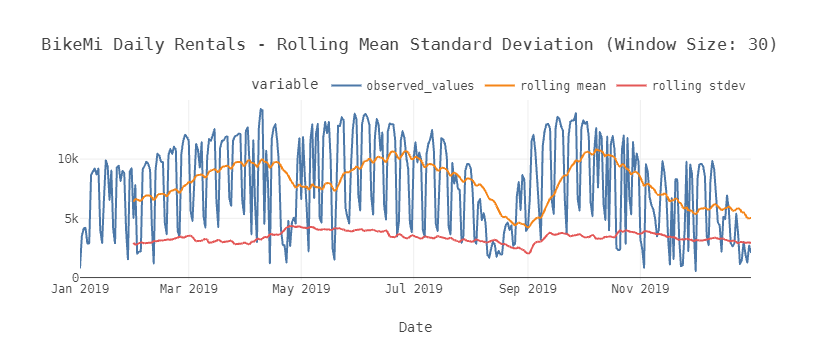

In [7]:
tsa.px_rolling_statistics(
    ts=daily_outflow, col="count", lags=30, statistics=["mean", "std"]
)

We could plot the individual values for each month to display the difference in values. However, we can show these features better with a boxplot:

## Seasonality Boxplots

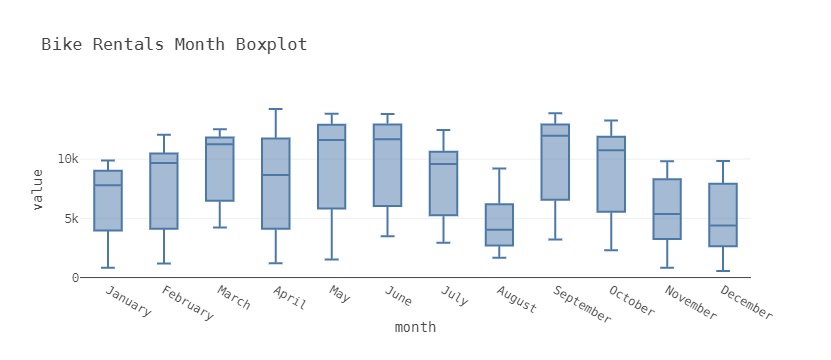

In [11]:
tsa.subunits_boxplot(daily_outflow["count"], y="count", time_subunit="month")

However, the most important source of variation clearly is the weekly seasonality. The boxplot function is designed to accept various time formats, so we can adapt it pretty quickly:

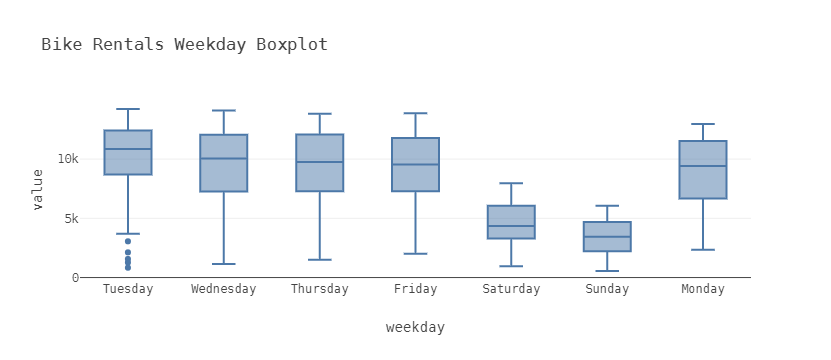

In [12]:
tsa.subunits_boxplot(daily_outflow["count"], y="count", time_subunit="weekday")